<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/DecisionTreeAssgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Company_Data.csv',sep=',')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df.ShelveLoc)

In [5]:
df['Urban'] = label_encoder.fit_transform(df['Urban'])

In [6]:
df['US'] = label_encoder.fit_transform(df['US'])

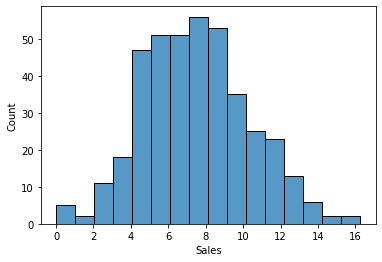

In [7]:
sns.histplot(df['Sales'])

###Creating a New Column sale(Low:if sales<=7,High:if sales>7 ) to create Decision Tree Based on given Condition

In [8]:
df['sale'] = ['LOW' if x <=7 else 'HIGH' for x in df['Sales']]

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,HIGH
1,11.22,111,48,16,260,83,1,65,10,1,1,HIGH
2,10.06,113,35,10,269,80,2,59,12,1,1,HIGH
3,7.40,117,100,4,466,97,2,55,14,1,1,HIGH
4,4.15,141,64,3,340,128,0,38,13,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,HIGH
396,6.14,139,23,3,37,120,2,55,11,0,1,LOW
397,7.41,162,26,12,368,159,2,40,18,1,1,HIGH
398,5.94,100,79,7,284,95,0,50,12,1,1,LOW


In [10]:
df = df.drop(columns=['Sales'],axis=1)

In [11]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,0,42,17,1,1,HIGH
1,111,48,16,260,83,1,65,10,1,1,HIGH
2,113,35,10,269,80,2,59,12,1,1,HIGH
3,117,100,4,466,97,2,55,14,1,1,HIGH
4,141,64,3,340,128,0,38,13,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,HIGH
396,139,23,3,37,120,2,55,11,0,1,LOW
397,162,26,12,368,159,2,40,18,1,1,HIGH
398,100,79,7,284,95,0,50,12,1,1,LOW


##Rearranging Order of Dataframe

In [12]:
df = df[['sale','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]

In [13]:
df

,sale,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,HIGH,138,73,11,276,120,0,42,17,1,1
1,HIGH,111,48,16,260,83,1,65,10,1,1
2,HIGH,113,35,10,269,80,2,59,12,1,1
3,HIGH,117,100,4,466,97,2,55,14,1,1
4,LOW,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,HIGH,138,108,17,203,128,1,33,14,1,1
396,LOW,139,23,3,37,120,2,55,11,0,1
397,HIGH,162,26,12,368,159,2,40,18,1,1
398,LOW,100,79,7,284,95,0,50,12,1,1


In [14]:
df["sale"].unique()

array(['HIGH', 'LOW'], dtype=object)

In [15]:
df['sale'].value_counts()

HIGH    216
LOW     184
Name: sale, dtype: int64

##Assigning Dependent and Independent Variables

In [16]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [17]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [18]:
Y

0      HIGH
1      HIGH
2      HIGH
3      HIGH
4       LOW
       ... 
395    HIGH
396     LOW
397    HIGH
398     LOW
399    HIGH
Name: sale, Length: 400, dtype: object

##Building a Decision Tree Using Entropy Criterion

In [19]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Cross Validation using K-Fold Cross Validation 

In [20]:
cv = KFold(n_splits=10)

In [21]:
result = cross_val_score(model,X,Y,cv=cv)

In [22]:
print(result.mean()*100)

74.25


##Plot the Decision Tree

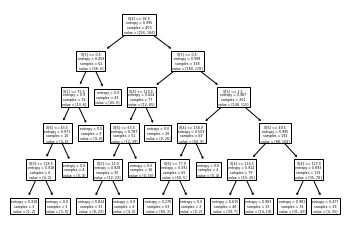

In [23]:
tree.plot_tree(model);

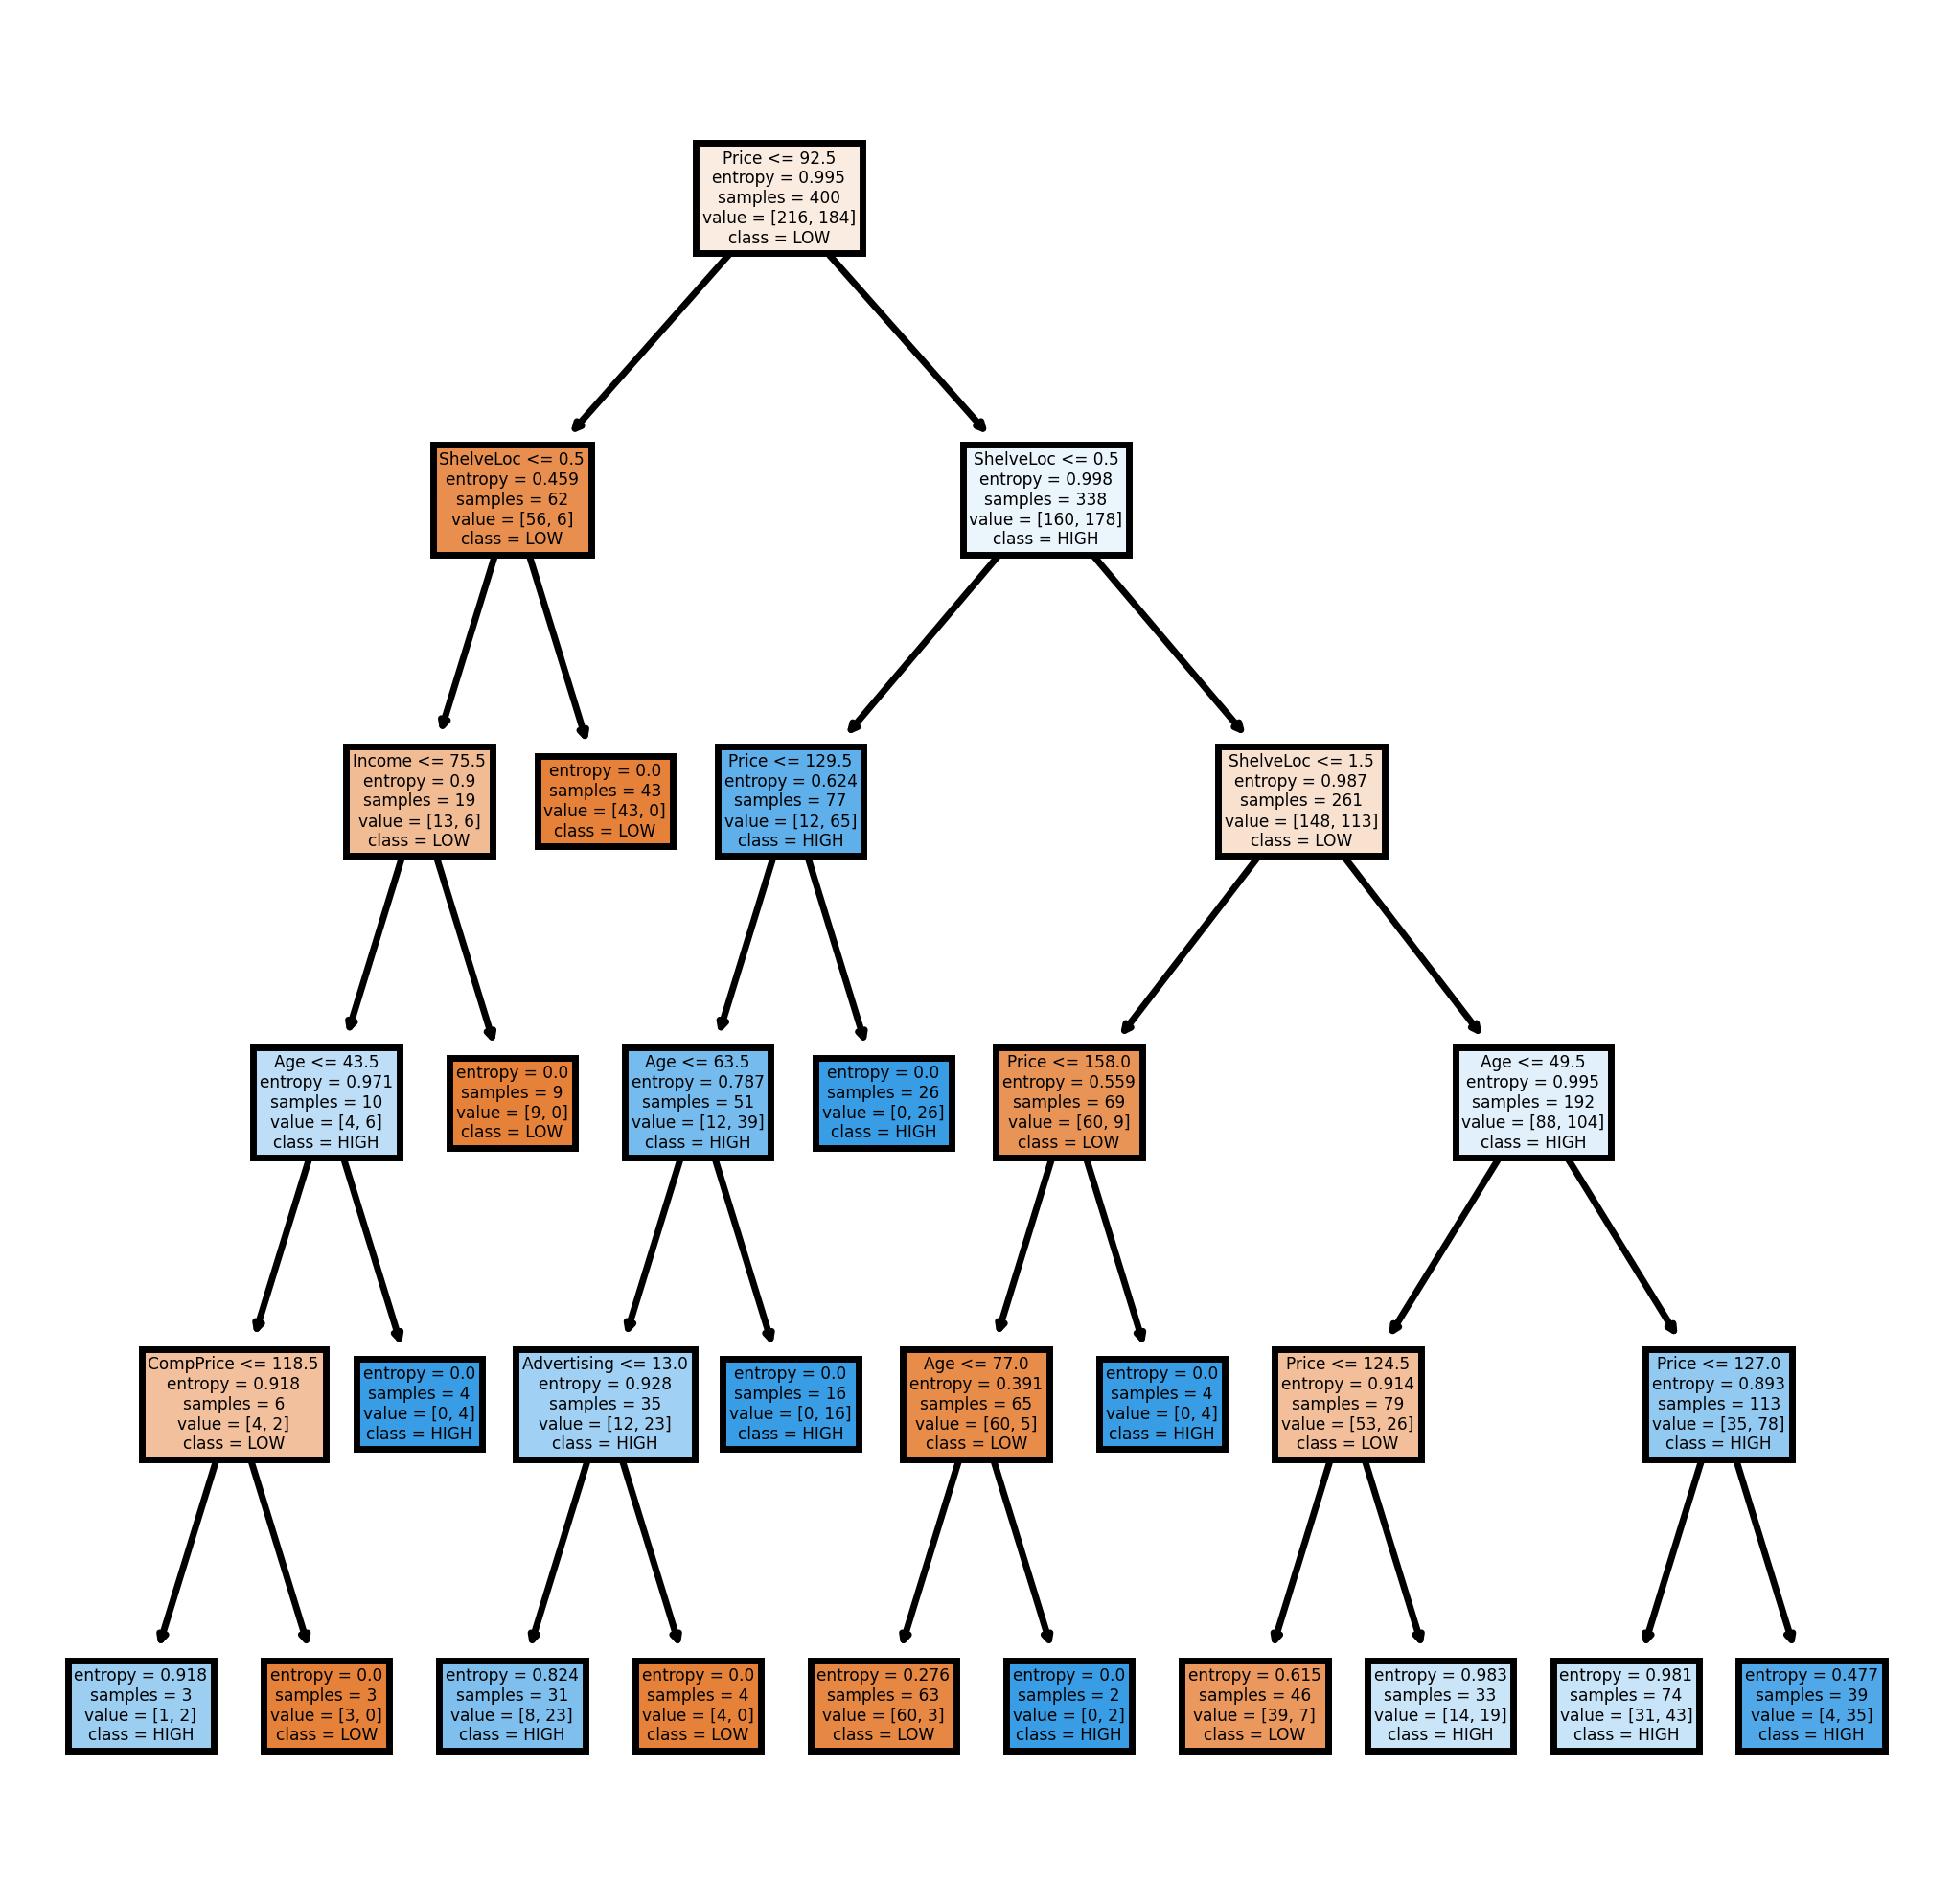

In [26]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['LOW','HIGH']
plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

#Decision Tree Using Gini Criterion

In [40]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=4)
model1.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Cross Validation Using K-Fold

In [41]:
cv=KFold(n_splits=10)

In [42]:
result1 = cross_val_score(model1,X,Y,cv=cv)

In [43]:
print(result1.mean()*100)

73.0


##Plot the Decision Tree

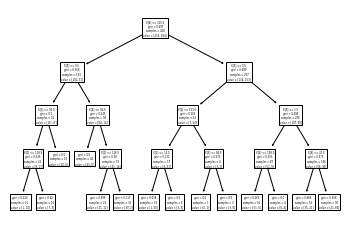

In [34]:
tree.plot_tree(model1);

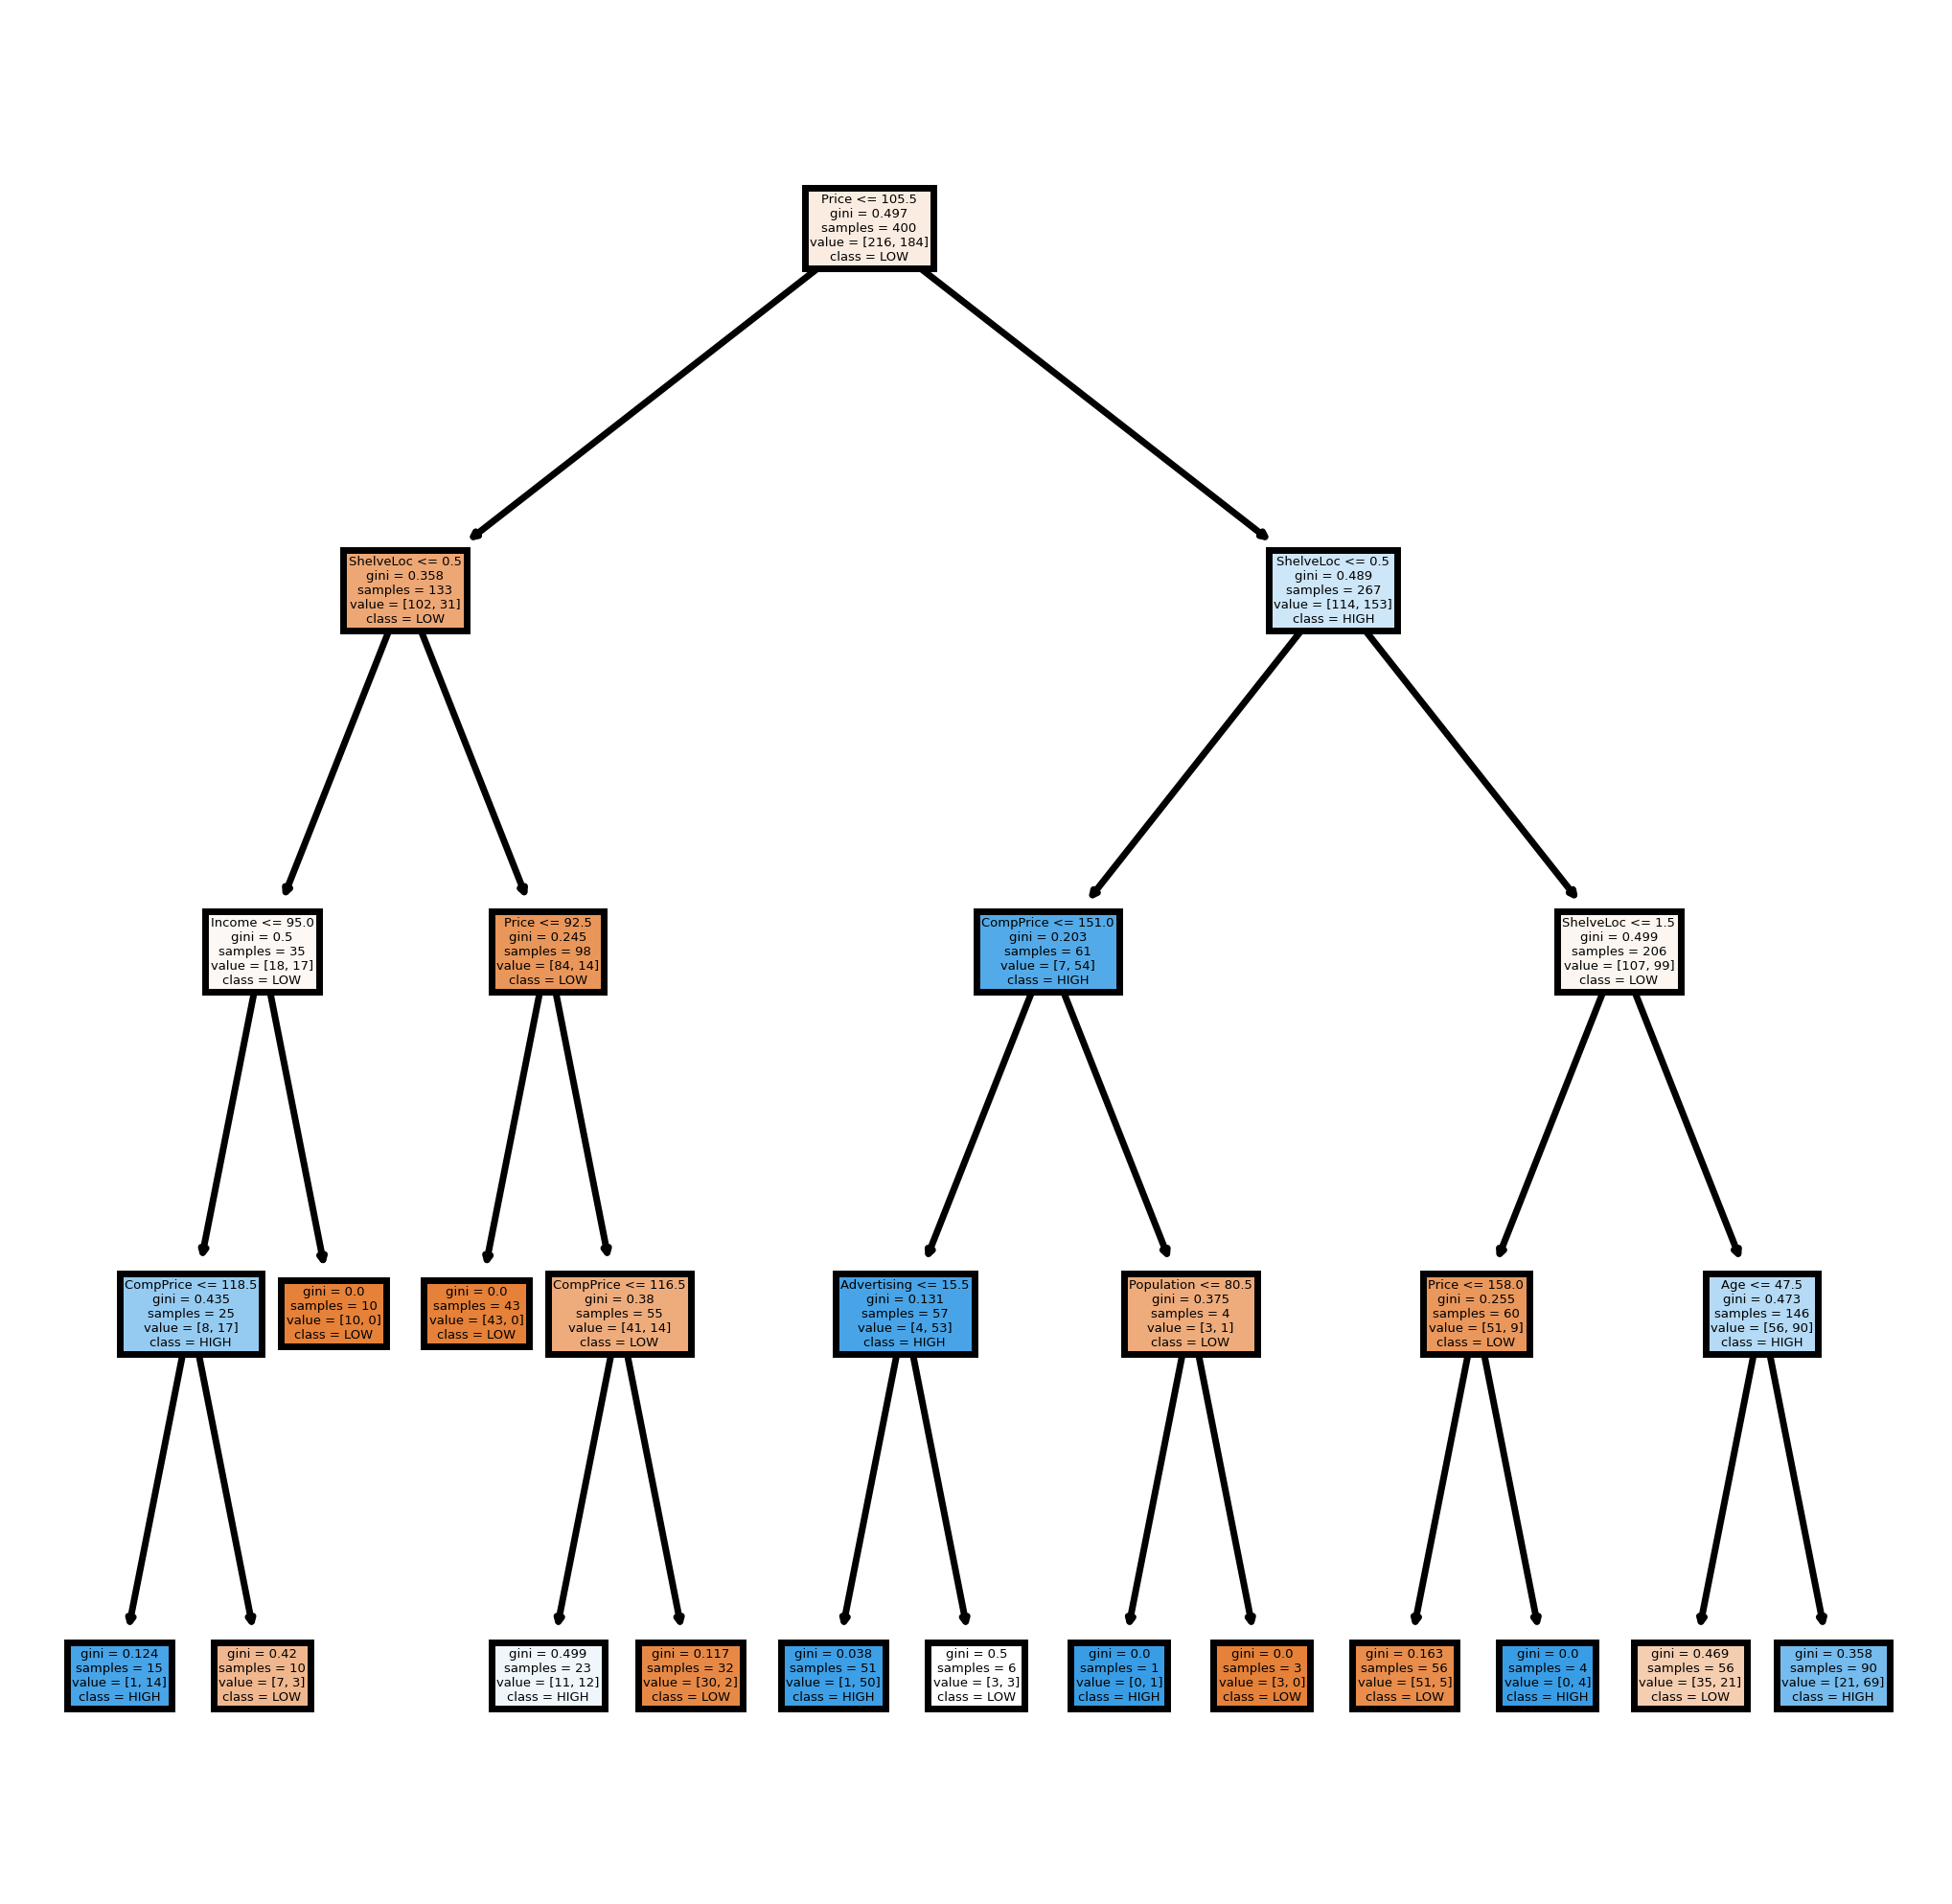

In [45]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['LOW','HIGH']
plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)
tree.plot_tree(model1,
               feature_names=fn,
               class_names=cn,
               filled=True);